# Planet: Understanding the Amazon from Space API Demo


#### The Model is built on data from kaggle challenge, Planet: Understanding the Amazon from Space.


The chips for this competition were derived from Planet's full-frame analytic scene products using 4-band satellites in sun-synchronous orbit (SSO) and International Space Station (ISS) orbit. The set of chips for this competition use the GeoTiff format and each contain four bands of data: red, green, blue, and near infrared.

***

#### Dataset

 - No. of Train Images: 40479
 - No. of Test Images:  61191
 
 In total, there are 17 classes, describing the weather and land-use pattern.
 - Weather: 
     ['clear', 'cloudy', 'haze', 'partly_cloudy']
 - Land Use: 
     ['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'conventional_mine',
      'cultivation', 'habitation', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']

![Dataset](https://storage.googleapis.com/kaggle-competitions/kaggle/6322/media/chips.jpg)

For more information on the patterns or datasets, please check [here](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data).

***

#### Model details
- Modified DenseNet121 (pretrained on ImageNet)
- Image Augmentation on RGB Images
- Fine-tuning with different image sizes
- Accuracy: 92.9 F2 Score with 30 Epochs, Learning Rate: Adaptive (1e-1 : 1e-6)

## Imports and constants

In [1]:
%matplotlib inline
import cv2
import requests
import matplotlib.pyplot as plt

host = '40.91.93.161'      # IP of the ACI
port = '80'                # port
prefix = 'v1/pytorch_api'  # path to your API
route = 'classify'         # function call

URL = f'http://{host}:{port}/{prefix}/{route}'
headers = {'content-type': 'image/jpeg'}

## Add blob storage

In [2]:
!ls data/test-jpg/ | head -5

file_0.jpg
file_10000.jpg
file_10001.jpg
file_10002.jpg
file_10003.jpg
ls: write error: Broken pipe


## Functions

In [9]:
def classify_api(img_path):
    with open(img_path, 'rb') as f:
        img = f.read()
        r = requests.post(URL, data=img, headers=headers)
        
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        return img, r.json()
    
def show(img, label):
    plt.title(label)
    plt.axis('off')
    plt.imshow(img)

## Call API and show results

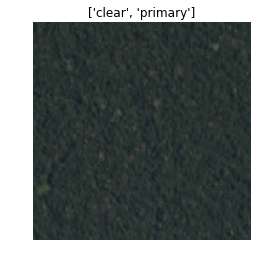

In [10]:
show(*classify_api('data/test-jpg/file_0.jpg'))

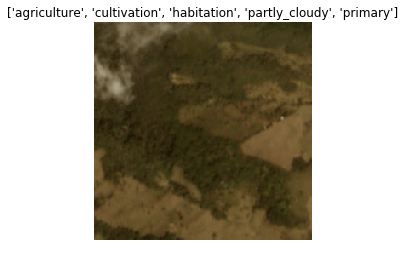

In [11]:
show(*classify_api('data/test-jpg/file_1.jpg'))

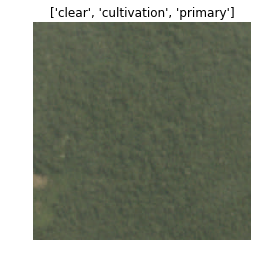

In [12]:
show(*classify_api('data/test-jpg/file_2.jpg'))

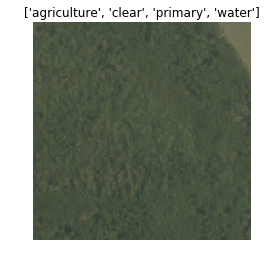

In [13]:
show(*classify_api('data/test-jpg/file_3.jpg'))

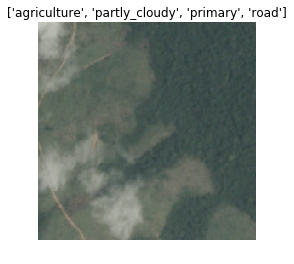

In [15]:
show(*classify_api('data/test-jpg/file_4.jpg'))